# 3.1 - Data Cleaning


![cleaning](images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad obsservacional forma una tabla.
$$$$
![clean](images/data_clean.png)




# Ejemplo...

### Importaciones y carga de datos.

In [1]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')  # para quitar warnings

pd.set_option('display.max_columns', None) # muestra todas las columnas del df.head()
#pd.set_option('display.max_rows', None)    # muestra todas las filas del df

In [2]:
df = pd.read_csv('../data/vehicles_messy.csv')

In [3]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Exploración

In [4]:
dim_original = df.shape

In [5]:
dim_original # dimesiones del df original

(37843, 83)

In [6]:
df.columns # columnas

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
df.make.value_counts() # cuenta el número de marcas de coches

Chevrolet                      3795
Ford                           3102
Dodge                          2513
GMC                            2389
Toyota                         1919
                               ... 
ASC Incorporated                  1
Volga Associated Automobile       1
Panoz Auto-Development            1
Panos                             1
Mahindra                          1
Name: make, Length: 133, dtype: int64

In [8]:
df.dtypes #tipo de dato de cada columna

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [10]:
nan_cols = df.isna().sum()

In [11]:
nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [12]:
len(df)

37843

In [13]:
df.evMotor.unique() # la vamos a borrar pero hay que tener cuidado

array([nan, '62 KW AC Induction', '50 KW DC', '27 KW AC Induction',
       '67 KW AC Induction', '24 KW AC Synchronous', '288V Ni-MH',
       '330V Ni-MH', '36V Ni-MH', '245V Ni-MH', '158V Ni-MH',
       '202V Ni-MH', '300V Ni-MH', '101V Ni-MH', '275V Ni-MH',
       '126V Li-Ion', '312V Ni-MH', '67 KW AC  Induction', '67 KW AC',
       '102kW AC Induction', '49kW DC Brushless', '56kW AC Induction',
       '49 kW DC Brushless', '85 kW AC Induction', '150 kW', '80 kW DCPM',
       '111 kW', '30 kW DCPM', '270V Li-Ion', '144V Li-Ion',
       '346V Li-Ion', '115V Li-Ion', '49 kW DCPM', '52 kW AC Induction',
       '144V Ni-MH', '125 kW AC Induction', '100 kW DCPM',
       '107 kW AC Induction', '18 kW', '2 @ 150 kw (300 kw)',
       '260 kW AC Induction', '280V Li-Ion', '107 kW AC PMSM',
       '374V Li-Ion', '92 kW DCPM', '266V Li-Ion', '55 kW DCPM',
       '115 kW AC Induction', '68 kW', '220V Li-Ion',
       '225 kW AC Induction', '270 kW AC Induction', '75 kW AC PMSM',
       '82 kW AC

### Borrado de columnas con más de 10.000 valores nulos

In [14]:
nan_cols[nan_cols>1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

In [15]:
df_original = df.copy()

In [16]:
df.drop(columns=nan_cols[nan_cols>1e4].index, inplace=True)

In [17]:
df.shape, dim_original

((37843, 70), (37843, 83))

### Exploración columnas `cylinders` y `displ`

In [18]:
nan_cols = df.isna().sum()

In [19]:
nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [20]:
null_col = df.isnull().sum() # hace lo mismo que isna()

In [21]:
null_col[null_col>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [22]:
#cylinders
bad_index = df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

In [23]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.unique()

array(['Electricity', 'Regular'], dtype=object)

In [24]:
df.cylinders.dtype

dtype('float64')

In [25]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].model.unique()

array(['Altra EV', 'RAV4 EV', 'Th!nk', 'Explorer USPS Electric',
       'Hyper-Mini', 'RX Turbo', 'RX-7', 'Ranger Pickup 2WD', 'EV1',
       'EV Plus', 'Caravan/Grand Caravan 2WD',
       'Voyager/Grand Voyager 2WD', 'S10 Electric', 'MiniE', 'Leaf',
       'fortwo electric drive cabriolet', 'fortwo electric drive coupe',
       'i-MiEV', 'Transit Connect Electric Van',
       'Transit Connect Electric Wagon', 'Active E', 'CODA',
       'Focus Electric', 'Model S', 'Fit EV',
       'fortwo electric drive convertible', 'iQ EV',
       'Model S (60 kW-hr battery pack)',
       'Model S (85 kW-hr battery pack)', 'e6', '500e',
       'Model S (40 kW-hr battery pack)', 'Spark EV', 'i3 BEV',
       'B-Class Electric Drive', 'Soul Electric', 'e-Golf',
       'Model S AWD (85 kW-hr battery pack)', 'Model S AWD - P85D',
       'Model S AWD - 85D', 'Model S AWD - 70D', 'Model S AWD - 90D',
       'Model S AWD - P90D', 'Model X AWD - 90D', 'Model X AWD - P90D',
       'B250e', 'Leaf (24 kW-hr batt

**Espera, son eléctricos, de hecho existe un Mazda con motor rotatorio. Efectivamente no tienen cilindros ni cilindrada**

In [26]:
df[['cylinders', 'displ']] = df[['cylinders', 'displ']].fillna(0) # rellenamos los datos nulos con cero

In [27]:
df[['cylinders', 'displ']].fillna(0, inplace=True) # hace lo mismo que la casilla de arriba

In [28]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head()

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,0.0,0.0
7139,Toyota,RAV4 EV,Electricity,0.0,0.0
8143,Toyota,RAV4 EV,Electricity,0.0,0.0
8144,Ford,Th!nk,Electricity,0.0,0.0
8146,Ford,Explorer USPS Electric,Electricity,0.0,0.0


In [29]:
nan_cols = df.isnull().sum()

In [30]:
nan_cols[nan_cols>0]

drive    1189
trany      11
dtype: int64

### Exploración columna `drive`

In [31]:
bad_index = df.drive[df.drive.isna()].index

In [32]:
bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

In [33]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].head()

,make,model,fuelType,drive
7138,Nissan,Altra EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
18217,Alfa Romeo,Spider Veloce 2000,Regular,NaN
18218,Bertone,X1/9,Regular,NaN


**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`?**

In [34]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

In [35]:
df.drive.fillna('unknown', inplace=True)

In [36]:
nan_cols = df.isna().sum()

nan_cols[nan_cols > 0]

trany    11
dtype: int64

### Exploración columna `trany`

In [37]:
df.trany.head()

0       Manual 5-spd
1       Manual 5-spd
2       Manual 5-spd
3    Automatic 3-spd
4       Manual 5-spd
Name: trany, dtype: object

In [40]:
bad_index = df.trany[df.trany.isna()].index

In [41]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'trany']].head()

,make,model,fuelType,trany
7138,Nissan,Altra EV,Electricity,NaN
7139,Toyota,RAV4 EV,Electricity,NaN
8143,Toyota,RAV4 EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN


In [42]:
df.trany.fillna('unknown', inplace=True)

In [43]:
nan_cols = df.isna().sum()

In [44]:
nan_cols[nan_cols >0]

Series([], dtype: int64)

**Hasta aquí la limpieza de nulos.**

### Eliminación de duplicados

In [47]:
df.drop_duplicates().shape, df.shape # son iguales no hay duplicados

((37843, 70), (37843, 70))

In [48]:
df.drop_duplicates().shape, df.shape.shape == df.shape

True

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df[df.duplicated(keep=False)] # para mostrar filas duplicadas

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb


### Columnas constantes o de baja varianza

Nos fijaremos en las columnas numéricas.

In [51]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

['charge120']

In [52]:
df.charge120.value_counts()

0.0    37843
Name: charge120, dtype: int64

In [53]:
df.drop(cte_cols, axis=1, inplace=True)

In [54]:
cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

[]

In [56]:
cte_str_cols = []

for c in df.select_dtypes(include='object'): # para columnas de tipo No numérico
    
    if len(df[c].unique())==1:
        cte_str_cols.append(c)
        
cte_str_cols

[]

In [57]:
df.shape, dim_original

((37843, 69), (37843, 83))

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrían ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

In [60]:
#stats

stats = df.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
youSaveSpend,37843.0,-2658.999022,2553.098329,-22250.0,-4250.0,-2500.0,-750.0,4000.0,3500.0
charge240b,37843.0,0.004360,0.142776,0.0,0.0,0.0,0.0,7.0,0.0
phevCity,37843.0,0.069313,1.966806,0.0,0.0,0.0,0.0,97.0,0.0
phevHwy,37843.0,0.068203,1.871986,0.0,0.0,0.0,0.0,79.0,0.0
phevComb,37843.0,0.068573,1.913647,0.0,0.0,0.0,0.0,88.0,0.0


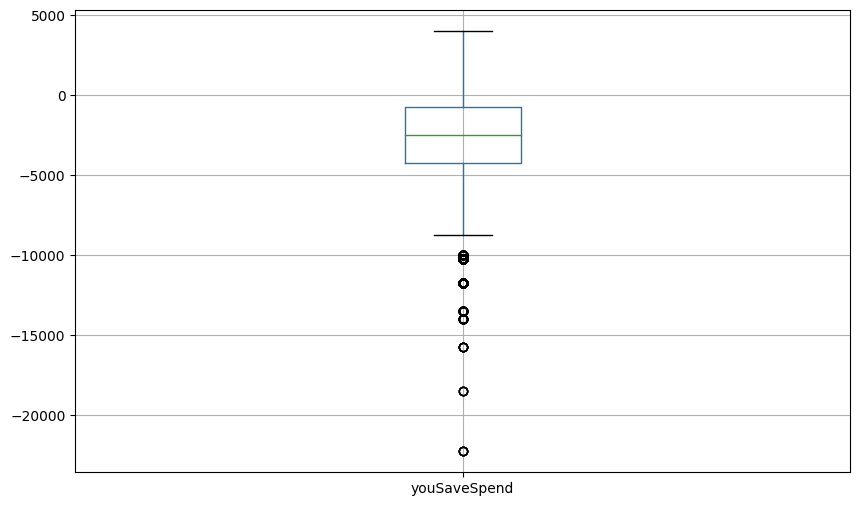

In [65]:
df[['youSaveSpend']].boxplot(figsize=(10,6));

In [66]:
outliers = pd.DataFrame(columns=stats.index)

outliers

,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb


In [71]:
for c in stats.index:
    
    iqr = stats.at[c, 'IQR']
    
    cut_off = 1.5 * iqr # test tukey
    
    lower = stats.at[c, '25%'] - cut_off
    upper = stats.at[c, '75%'] + cut_off
    
    res = df[(df[c] < lower) | (df[c] > upper)].copy()
    
    res['outliers'] = c
    
    outliers = outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

highway08U         21897
city08U            21897
comb08U            21897
engId              20031
lv2                18750
pv2                18717
co2                17562
ghgScore           17445
feScore            17445
hlv                13845
hpv                13842
city08              4410
UCity               4320
highwayA08          4224
cityA08             4224
barrelsA08          4224
combA08             4224
fuelCostA08         4116
UCityA              4086
UHighwayA           4086
lv4                 4071
co2TailpipeAGpm     4059
highway08           2988
comb08              2907
UHighway            2679
cylinders           2559
co2TailpipeGpm      2490
highwayA08U         2220
cityA08U            2220
combA08U            2220
youSaveSpend        1812
fuelCost08          1812
co2A                1575
ghgScoreA           1554
barrels08           1296
combE                525
cityE                525
highwayE             525
charge240            456
range                360


In [70]:
def get_outliers(stats:pd.DataFrame, threshold: float = 1.5)-> pd.DataFrame:
    '''
        Esta función recibe un dataframe del tipo df.describe().T
        
        Nos devuelver un dataframe con los outliers
        
        Params:
            stats = pd.DataFrame.describe().T
            threshold = float, con el umbral de tukey
        
        Return:
            pd.DataFrame
    
    '''
    
    outliers = pd.DataFrame(columns=stats.index)
    
    for c in stats.index:
        iqr = stats.at[c, 'IQR']
        
        cut_off = threshold * iqr 
        
        lower = stats.at[c, '25%'] - cut_off
        upper = stats.at[c, '75%'] + cut_off
        
        res = df[(df[c] < lower) | (df[c] > upper)].copy()
        
        res['outliers'] = c
        
        outliers = outliers.append(res, sort=True)
        
    return outliers

In [73]:
outliers.head()

,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge240,charge240b,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,createdOn,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,modifiedOn,mpgData,outliers,phevBlended,phevCity,phevComb,phevHwy,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,year,youSaveSpend
47,11.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1004,0,0,Dodge,B150/B250 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
58,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2854,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1005,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
69,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2850,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1006,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
80,11.0,0.0,14.0,0.0,Vans,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,0,Regular,Regular Gasoline,-1,-1,10,0.0,0,0.0,0.0,0.0,0.0,0,0,1007,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
275,11.0,0.0,16.0,0.0,Standard Pickup Trucks,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,7.4,Rear-Wheel Drive,4880,-1,3350,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,10245,0,0,Chevrolet,C1500 Pickup 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 4-spd,1993,-10000


In [74]:
clean_index = [i for i in df.index if i not in outliers.index]

In [75]:
len(clean_index)

15824

In [76]:
clean_index[:10]

[0, 14, 25, 33, 34, 36, 41, 48, 49, 50]

In [78]:
df = df.iloc[clean_index]

<AxesSubplot:>

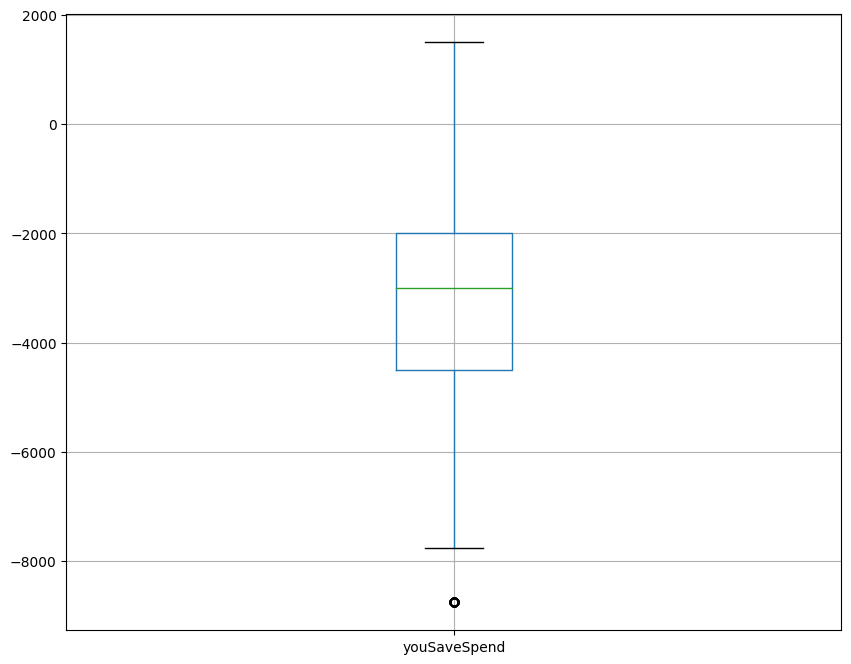

In [79]:
df[['youSaveSpend']].boxplot(figsize=(10,8))

### Colinealidad  

Columnas con la misma información.

### Limpieza columna `trany`

## DataFrame Final

**Cuidado de no eliminarlo todo....**